## Import statements

In [1]:
# # Import Statements

# General
import pandas as pd
import numpy as np

# Paths and Files
from pathlib import Path

# Data Processing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Plotting
import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D

In [2]:
# Importing the warnings package to suppress the warnings
import warnings
warnings.filterwarnings("ignore")

## Load the csv data

In [3]:
# Load the data into a Pandas DataFrame
stock_data_df = pd.read_csv(
    Path("./Data_Files/mid_cap_stock_data.csv"),
    index_col="ticker"
)

In [4]:
# Review the csv data
stock_data_df.head()

,year,gross_profit_margin,ebit,return_on_sales,return_on_assets,return_on_equity,ebitda,eps,avg_revenue_growth_1_yr,debt_to_sales
ticker,,,,,,,,,,
BYDIY,2022,-9.448575e+10,7.854485e+09,0.073279,0.032593,0.072464,4.937601e+09,41.0000,0.203570,0.027328
ONTO,2023,-7.095000e+07,2.611000e+08,0.320027,0.063444,0.069771,1.938880e+08,2.4700,-0.188339,0.023927
COHR,2023,-1.923534e+09,7.321020e+08,0.141877,-0.018923,-0.052021,5.041500e+07,-1.8900,0.555833,0.869909
BYDIF,2022,-9.448575e+10,7.854485e+09,0.073279,0.032593,0.072464,4.937601e+09,0.8200,0.203570,0.027328
OLED,2023,3.056770e+08,3.039930e+08,0.527373,0.121639,0.140276,2.605910e+08,0.0043,-0.065178,0.039649


In [5]:
# Loading the successful acquisitions into the dataframe
successful_acquisition_stock_data_df = pd.read_csv(
    Path("./Data_Files/successful_acquisition_stock_data.csv"),
    index_col="ticker"
)

In [6]:
successful_acquisition_stock_data_df.head()

,year,gross_profit_margin,ebit,return_on_sales,return_on_assets,return_on_equity,ebitda,eps,avg_revenue_growth_1_yr,debt_to_sales
ticker,,,,,,,,,,
WORK,2020,6.592260e+08,-2.049960e+08,-0.227115,-0.123442,-0.350370,-2.338140e+08,-0.53,0.431755,0.760382
FIT,2019,-5.794440e+08,-1.829770e+08,-0.127529,-0.234423,-0.658189,-2.460210e+08,-1.25,-0.051055,0.064676
LNKD,2015,2.153195e+09,7.261630e+08,0.242790,-0.023697,-0.037180,2.804660e+08,-1.29,0.348006,0.376652
ATVI,2022,3.084000e+09,2.666000e+09,0.354145,0.055253,0.078626,2.168000e+09,1.92,-0.144837,0.479676
ARM,2023,2.467000e+09,1.025000e+09,0.382605,0.076318,0.129351,8.550000e+08,0.51,-0.008879,0.081747


In [7]:
# Merging the two datasets
stock_data_df = pd.concat([stock_data_df, successful_acquisition_stock_data_df], axis="rows")

In [8]:
stock_data_df.head(55)

,year,gross_profit_margin,ebit,return_on_sales,return_on_assets,return_on_equity,ebitda,eps,avg_revenue_growth_1_yr,debt_to_sales
ticker,,,,,,,,,,
BYDIY,2022,-9.448575e+10,7.854485e+09,0.073279,0.032593,0.072464,4.937601e+09,41.0000,0.203570,0.027328
ONTO,2023,-7.095000e+07,2.611000e+08,0.320027,0.063444,0.069771,1.938880e+08,2.4700,-0.188339,0.023927
COHR,2023,-1.923534e+09,7.321020e+08,0.141877,-0.018923,-0.052021,5.041500e+07,-1.8900,0.555833,0.869909
BYDIF,2022,-9.448575e+10,7.854485e+09,0.073279,0.032593,0.072464,4.937601e+09,0.8200,0.203570,0.027328
OLED,2023,3.056770e+08,3.039930e+08,0.527373,0.121639,0.140276,2.605910e+08,0.0043,-0.065178,0.039649
MKSI,2023,-9.420000e+08,1.171000e+09,0.323302,-0.201908,-0.744741,7.740000e+08,-27.5600,0.021145,1.387079
OMRNY,2022,-8.831600e+10,1.515830e+11,0.173024,0.073997,0.101392,1.249960e+11,372.1900,0.148317,0.051785
AMKR,2023,-4.616759e+09,1.733303e+09,0.266536,0.053139,0.090809,1.101795e+09,1.4600,-0.082988,0.212878
SOTGY,2022,-1.998694e+10,6.653378e+09,0.200421,0.055994,0.110255,4.712799e+09,22.0300,-0.114674,0.193915


## Prepare the data

1) Clean the dataframe by removing outliers
2) Scale the data using Standard Scaler
3) Make a new DataFrame for the scaled data
4) Reduce the dimentionality of the dataframe if desired

In [9]:
# Remove all companies who had no sales (and therefore their debt_to_sales ratio is infinity)
# stock_data_df.drop(index=stock_data_df[stock_data_df['avg_revenue_growth_3_yrs'] == np.inf].index, inplace=True)
stock_data_df.drop(index=stock_data_df[stock_data_df['avg_revenue_growth_1_yr'] == np.inf].index, inplace=True)

In [10]:
# Make a copy of the stock_data_df that contains all scaleable values
stock_data_to_be_scaled = stock_data_df.drop(columns=['year'])

In [11]:
# Review the dataframe
# stock_data_to_be_scaled.head()

In [12]:
# Use StandardScaler() to scale the data
scaled_data = StandardScaler().fit_transform(stock_data_to_be_scaled)

# Create a dataframe with the scaled_data
stock_data_scaled_df = pd.DataFrame(
    scaled_data,
    columns = stock_data_to_be_scaled.columns
)

In [13]:
# Copy the index values from the original data and set those values to be the index of the scaled dataframe
stock_data_scaled_df['ticker'] = stock_data_df.index
stock_data_scaled_df = stock_data_scaled_df.set_index('ticker')

# Add the year data from the original dataset
# stock_data_scaled_df['year'] = stock_data_df['year']

In [14]:
# Copy the full dataset for PCA before the dimensionality is reduced
stock_data_scaled_pca_df = stock_data_scaled_df.copy()

In [15]:
# Reducing the dimensionality of the dataset to two variables related to growth and debt
# stock_data_scaled_df = stock_data_scaled_df[['avg_revenue_growth_3_yrs','debt_to_sales']]
stock_data_scaled_df = stock_data_scaled_df[['avg_revenue_growth_1_yr','debt_to_sales']]

In [16]:
# Review the data
stock_data_scaled_df

,avg_revenue_growth_1_yr,debt_to_sales
ticker,,
BYDIY,0.668322,-0.790413
ONTO,-0.994208,-0.802254
COHR,2.162670,2.142647
BYDIF,0.668322,-0.790413
OLED,-0.471743,-0.747523
MKSI,-0.105551,3.942939
OMRNY,0.433932,-0.705278
AMKR,-0.547298,-0.144505
SOTGY,-0.681712,-0.210518


## K-means using the Original Data

In [17]:
stock_data_scaled_df.head(50)

,avg_revenue_growth_1_yr,debt_to_sales
ticker,,
BYDIY,0.668322,-0.790413
ONTO,-0.994208,-0.802254
COHR,2.162670,2.142647
BYDIF,0.668322,-0.790413
OLED,-0.471743,-0.747523
MKSI,-0.105551,3.942939
OMRNY,0.433932,-0.705278
AMKR,-0.547298,-0.144505
SOTGY,-0.681712,-0.210518


### Find the best value for k

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

In [19]:
# Create an empty list to store the inertia values
inertia = []

In [20]:
# Create a loop to compute the inertia for each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(stock_data_scaled_df)
    inertia.append(k_model.inertia_)

In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow =  pd.DataFrame(elbow_data)

# Review the dataframe
df_elbow

,k,inertia
0,1,108.000000
1,2,77.353599
2,3,46.698191
3,4,27.953518
4,5,23.109713
5,6,15.472850
6,7,12.447576
7,8,10.124587
8,9,9.367411
9,10,7.796497


In [22]:
# Plot a line graph with all the inertia values to visually identify the optimal value for k
elbow_curve_original_data = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve for the Original Data", 
    xticks=k
)

elbow_curve_original_data

:Curve   [k]   (inertia)

### Build the K-Means model with 5 clusters

From above, the optimal number of clusters is probably 4, so we're going to build the mode with 4 clusters.

In [23]:
# Initialize the K-Means model using the best value for k
# Note that a fixed random state value is used to get repeatable results
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [24]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(stock_data_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [25]:
# Predict the clusters to group the stocks using the scaled data
kmeans_predictions = kmeans_model.predict(stock_data_scaled_df)

# View the resulting array of cluster values
print(kmeans_predictions)

[1 0 3 1 0 2 1 0 0 1 0 0 2 2 2 2 2 3 1 2 1 2 0 1 1 2 1 1 1 0 1 1 2 1 1 1 0
 0 0 0 1 1 3 0 0 1 0 0 0 3 0 3 2 0]


In [26]:
# Create a copy of the stock dataframe
stock_data_scaled_with_predictions_df = stock_data_scaled_df.copy()

# Add a new column with the predicted clusters
stock_data_scaled_with_predictions_df['kmeans_cluster'] = kmeans_predictions

# Review the dataframe
stock_data_scaled_with_predictions_df.head(54)

,avg_revenue_growth_1_yr,debt_to_sales,kmeans_cluster
ticker,,,
BYDIY,0.668322,-0.790413,1
ONTO,-0.994208,-0.802254,0
COHR,2.162670,2.142647,3
BYDIF,0.668322,-0.790413,1
OLED,-0.471743,-0.747523,0
MKSI,-0.105551,3.942939,2
OMRNY,0.433932,-0.705278,1
AMKR,-0.547298,-0.144505,0
SOTGY,-0.681712,-0.210518,0


In [27]:
# Create a scatter plot using hvPlot
# Color the graph points with the labels found using K-Means
# Add the ticker in the `hover_cols` parameter to identify the stock represented by each data point
kmeans_scatter_plot_original_data = stock_data_scaled_with_predictions_df.hvplot.scatter(
    # x="avg_revenue_growth_3_yrs",
    x="avg_revenue_growth_1_yr",
    y="debt_to_sales",
    by="kmeans_cluster",
    hover_cols="ticker"
).opts(
    yformatter="%.0f",
    title='KMeans Scatter Plot of the Clusters Based on the Original Data'
)

kmeans_scatter_plot_original_data

:NdOverlay   [kmeans_cluster]
   :Scatter   [avg_revenue_growth_1_yr]   (debt_to_sales,ticker)

In [28]:
stock_data_scaled_with_predictions_df.loc[stock_data_scaled_with_predictions_df['kmeans_cluster'] == 3]

,avg_revenue_growth_1_yr,debt_to_sales,kmeans_cluster
ticker,,,
COHR,2.162670,2.142647,3
SLOIF,1.832087,1.365426,3
IONQ,3.963044,0.394460,3
WORK,1.636316,1.761378,3
LNKD,1.281040,0.425600,3


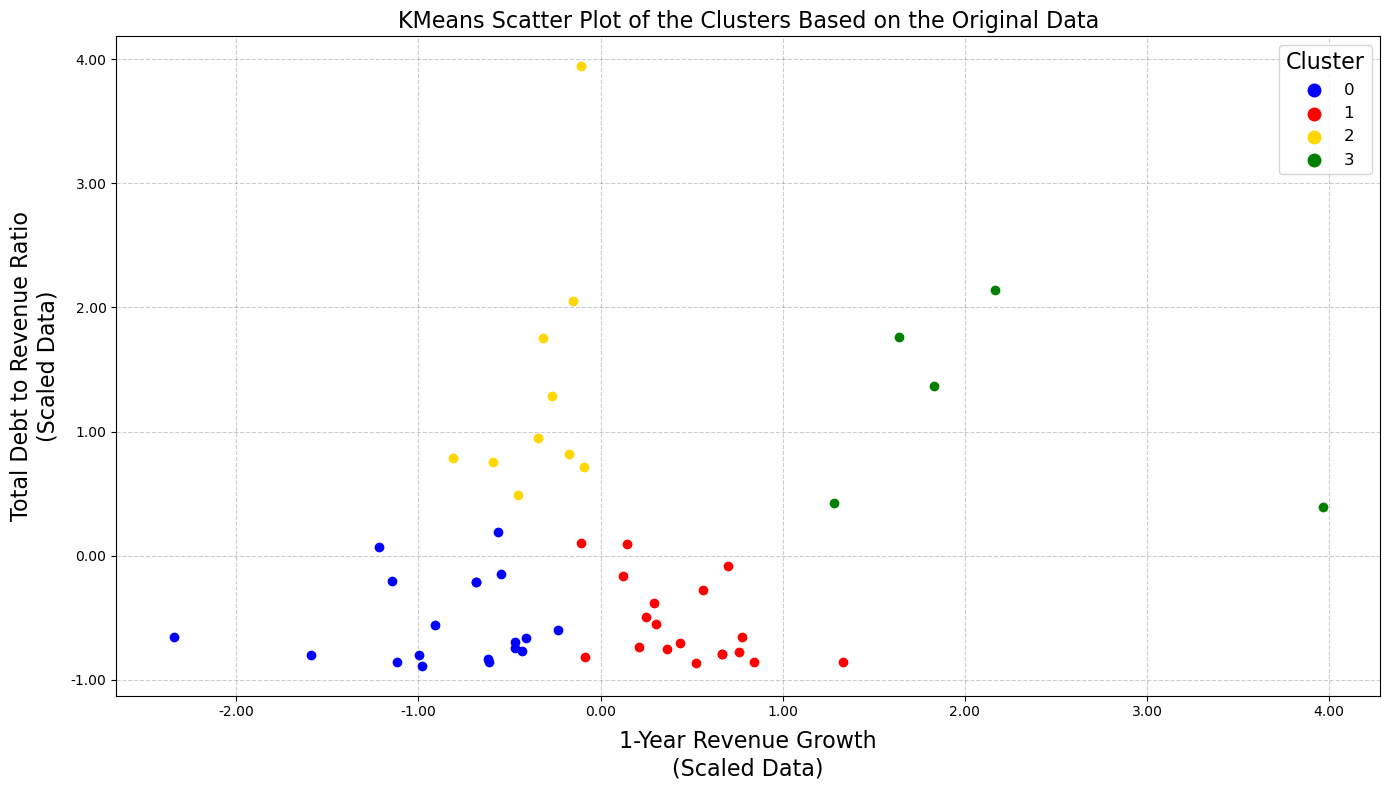

In [64]:
# # Use Matplotlib to make a plot

# Create a list of cluster colors
cluster_colors = ['blue','red','gold','green']

# Create a list of cluster numbers
cluster_numbers = [0,1,2,3]

# Initialize the plot in Matplotlib
fig, ax = plt.subplots(figsize=(14,8))

# In order for the legend to work properly, each of the clusters must be plotted in a separate instance
# For each value from 0 to the number of unique clusters:
for i in range(0,len(stock_data_scaled_with_predictions_df.kmeans_cluster.unique())):
    # Create a subset of the dataframe containing only the values in that cluster
    dataframe_subset = stock_data_scaled_with_predictions_df.loc[stock_data_scaled_with_predictions_df['kmeans_cluster'] == i]
    # Plot the subset
    ax.scatter(dataframe_subset['avg_revenue_growth_1_yr'],dataframe_subset['debt_to_sales'],color=cluster_colors[i],label=cluster_numbers[i])
    # Annotate the subset if desired
    if i == 3:
        for j in range(0,len(dataframe_subset)):
            ax.annotate(
                dataframe_subset.index[j], # Annotation text
                xycoords='data', # How the coordinates are interpreted
                xy = (dataframe_subset['avg_revenue_growth_1_yr'][j],dataframe_subset['debt_to_sales'][j]), # Location of the annotation point
                xytext=(dataframe_subset['avg_revenue_growth_1_yr'][j]+0.05,dataframe_subset['debt_to_sales'][j]+0.05), # Location of the annotation text
                # verticalalignment = 'center',
                # bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
                # arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
                # size=12
            )

# Add a title to the plot
plt.title("KMeans Scatter Plot of the Clusters Based on the Original Data", fontsize=16)

# Create a variable that refers to the axis
ax = plt.gca()

# Set the x- and y-axis labels
ax.set_xlabel('1-Year Revenue Growth\n(Scaled Data)',fontsize=16,labelpad=8)
ax.set_ylabel('Total Debt to Revenue Ratio\n(Scaled Data)',fontsize=16,labelpad=8)

# Format the y-axis as a percentage
# The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Create a light grid to improve readability
ax.grid(which='major', color='k', linestyle='--', alpha=0.2)

plt.legend(
    title='Cluster'
    # , prop={'size':16}
    , fontsize = 12
    , title_fontsize=16
    , markerscale=1.5
)

# Reduce the whitespace around the plot
plt.tight_layout()

# Save the picture as a PNG
plt.savefig(Path("./Saved_Plots/01_kmeans_scatterplot_original_data.png"))

plt.show()

## DBSCAN using the Original Data

Noisy predictions (i.e., outliers) are assigned a cluster value of -1.

In [30]:
# Initialize a DBSCAN model
dbscan_model = DBSCAN(eps=0.35, min_samples=3)

In [31]:
# Fit and predict the model using the scaled data
# Noisy predictions are given a value of -1

# Method 1: using fit_predict
dbscan_predictions = dbscan_model.fit_predict(stock_data_scaled_df)

# Method 2: using fit, labels
# dbscan_model.fit(stock_data_scaled_df)
# dbscan_predictions = dbscan_model.labels_

In [32]:
# Review the predictions
print(dbscan_predictions)

[ 0  1 -1  0  0 -1  0  2  2  0  2  1 -1  2  2  2  2 -1  0 -1  0  2 -1  0
  0  2  0  0 -1  0  0  0  2  0  0  0  1  1  2 -1  0  0 -1 -1  0  0  0  0
 -1 -1  0 -1  2  0]


In [33]:
# Add a new column with the predicted clusters
stock_data_scaled_with_predictions_df['dbscan_cluster'] = dbscan_predictions

# Review the dataframe
stock_data_scaled_with_predictions_df.head(54)

,avg_revenue_growth_1_yr,debt_to_sales,kmeans_cluster,dbscan_cluster
ticker,,,,
BYDIY,0.668322,-0.790413,1,0
ONTO,-0.994208,-0.802254,0,1
COHR,2.162670,2.142647,3,-1
BYDIF,0.668322,-0.790413,1,0
OLED,-0.471743,-0.747523,0,0
MKSI,-0.105551,3.942939,2,-1
OMRNY,0.433932,-0.705278,1,0
AMKR,-0.547298,-0.144505,0,2
SOTGY,-0.681712,-0.210518,0,2


In [34]:
# Create a scatter plot using hvPlot
# Color the graph points with the labels found using DBSCAN
# Add the ticker in the `hover_cols` parameter to identify the stock represented by each data point

dbscan_scatter_plot_original_data = stock_data_scaled_with_predictions_df.hvplot.scatter(
    # x="avg_revenue_growth_3_yrs",
    x="avg_revenue_growth_1_yr",
    y="debt_to_sales",
    by="dbscan_cluster",
    hover_cols="ticker"
).opts(
    yformatter="%.0f",
    title='DBSCAN Scatter Plot of the Clusters Based on the Original Data'
)

dbscan_scatter_plot_original_data

:NdOverlay   [dbscan_cluster]
   :Scatter   [avg_revenue_growth_1_yr]   (debt_to_sales,ticker)

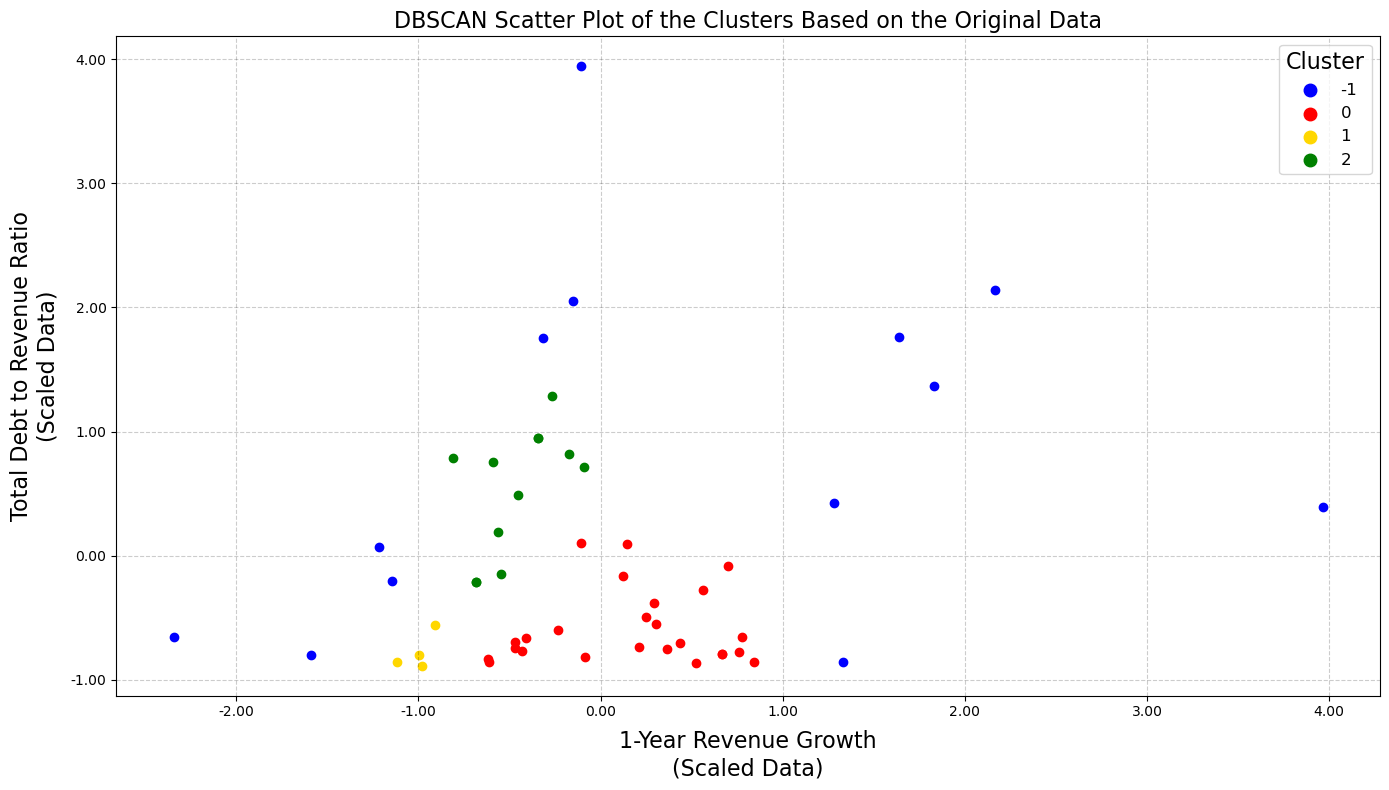

In [35]:
# # Use Matplotlib to make a plot

# Create a list of cluster colors
cluster_colors = ['blue','red','gold','green']

# Create a list of cluster numbers
cluster_numbers = [-1,0,1,2]

# Initialize the plot in Matplotlib
fig, ax = plt.subplots(figsize=(14,8))

# In order for the legend to work properly, each of the clusters must be plotted in a separate instance
# For each value from 0 to the number of unique clusters:
for i in range(0,len(stock_data_scaled_with_predictions_df.dbscan_cluster.unique())):
    # Create a subset of the dataframe containing only the values in that cluster
    dataframe_subset = stock_data_scaled_with_predictions_df.loc[stock_data_scaled_with_predictions_df['dbscan_cluster'] == (i-1)]
    # Plot the subset
    ax.scatter(dataframe_subset['avg_revenue_growth_1_yr'],dataframe_subset['debt_to_sales'],color=cluster_colors[i],label=cluster_numbers[i])
    # Annotate the subset if desired
    # if i == i:
    #     for j in range(0,len(dataframe_subset)):
    #         ax.annotate(
    #             dataframe_subset.index[j], # Annotation text
    #             xycoords='data', # How the coordinates are interpreted
    #             xy = (dataframe_subset['avg_revenue_growth_1_yr'][j],dataframe_subset['debt_to_sales'][j]), # Location of the annotation point
    #             xytext=(dataframe_subset['avg_revenue_growth_1_yr'][j]+0.05,dataframe_subset['debt_to_sales'][j]+0.05), # Location of the annotation text
    #             # verticalalignment = 'center',
    #             # bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    #             # arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    #             # size=12
    #         )

# Add a title to the plot
plt.title("DBSCAN Scatter Plot of the Clusters Based on the Original Data", fontsize=16)

# Create a variable that refers to the axis
ax = plt.gca()

# Set the x- and y-axis labels
ax.set_xlabel('1-Year Revenue Growth\n(Scaled Data)',fontsize=16,labelpad=8)
ax.set_ylabel('Total Debt to Revenue Ratio\n(Scaled Data)',fontsize=16,labelpad=8)

# Format the y-axis as a percentage
# The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Create a light grid to improve readability
ax.grid(which='major', color='k', linestyle='--', alpha=0.2)

plt.legend(
    title='Cluster'
    # , prop={'size':16}
    , fontsize = 12
    , title_fontsize=16
    , markerscale=1.5
)

# Reduce the whitespace around the plot
plt.tight_layout()

# Save the picture as a PNG
plt.savefig(Path("./Saved_Plots/02_dbscan_scatterplot_original_data.png"))

plt.show()

### Removing the Noisy Predictions

Making a scatter plot after removing the noisy predictions to make it easier to "see" the DBSCAN clusters.

In [36]:
# Create a copy of the stock dataframe
stock_data_scaled_with_predictions_no_outliers_df = stock_data_scaled_with_predictions_df.copy()

# Remove the DBSCAN outliers
stock_data_scaled_with_predictions_no_outliers_df = stock_data_scaled_with_predictions_no_outliers_df.loc[stock_data_scaled_with_predictions_no_outliers_df['dbscan_cluster'] != -1]

# Review the dataframe
stock_data_scaled_with_predictions_no_outliers_df

,avg_revenue_growth_1_yr,debt_to_sales,kmeans_cluster,dbscan_cluster
ticker,,,,
BYDIY,0.668322,-0.790413,1,0
ONTO,-0.994208,-0.802254,0,1
BYDIF,0.668322,-0.790413,1,0
OLED,-0.471743,-0.747523,0,0
OMRNY,0.433932,-0.705278,1,0
AMKR,-0.547298,-0.144505,0,2
SOTGY,-0.681712,-0.210518,0,2
FN,0.522979,-0.867880,1,0
SNPTF,-0.681712,-0.210518,0,2


In [37]:
# Create a scatter plot using hvPlot
# Color the graph points with the labels found using DBSCAN
# Add the ticker in the `hover_cols` parameter to identify the stock represented by each data point

dbscan_scatter_plot_original_data_no_outliers = stock_data_scaled_with_predictions_no_outliers_df.hvplot.scatter(
    # x="avg_revenue_growth_3_yrs",
    x="avg_revenue_growth_1_yr",
    y="debt_to_sales",
    by="dbscan_cluster",
    hover_cols="ticker"
).opts(
    yformatter="%.0f",
    title='DBSCAN Scatter Plot of the Clusters Based on the Original Data with No Outliers'
)

dbscan_scatter_plot_original_data_no_outliers

:NdOverlay   [dbscan_cluster]
   :Scatter   [avg_revenue_growth_1_yr]   (debt_to_sales,ticker)

## Reduce dimensionality using PCA

In [38]:
# Review the initial dataframe
stock_data_scaled_pca_df.head()

,gross_profit_margin,ebit,return_on_sales,return_on_assets,return_on_equity,ebitda,eps,avg_revenue_growth_1_yr,debt_to_sales
ticker,,,,,,,,,
BYDIY,-0.146600,0.085700,0.000743,0.023602,0.209909,0.101922,0.124898,0.668322,-0.790413
ONTO,-0.114003,0.063810,0.279894,0.340764,0.199762,0.088096,0.082762,-0.994208,-0.802254
COHR,-0.114643,0.065168,0.078350,-0.506016,-0.259076,0.087678,0.077994,2.162670,2.142647
BYDIF,-0.146600,0.085700,0.000743,0.023602,0.209909,0.101922,0.080957,0.668322,-0.790413
OLED,-0.113873,0.063934,0.514468,0.939050,0.465384,0.088290,0.080065,-0.471743,-0.747523


In [39]:
# Create a PCA model instance
number_of_components = 4

pca_instance = PCA(n_components=number_of_components)

In [40]:
# Use the PCA instance to fit_transform
stock_data_pca = pca_instance.fit_transform(stock_data_scaled_pca_df)

In [41]:
# View the first five rows, each with n components:
stock_data_pca[:5]

array([[-0.25752236, -0.08933315,  0.73507366, -0.42434811],
       [-0.13896316, -0.9678857 , -0.38685117, -0.85856541],
       [-0.35022449,  1.75254391,  0.4593367 ,  2.37711347],
       [-0.2361074 , -0.09147337,  0.73638683, -0.42135955],
       [-0.30745039, -1.3587386 ,  0.07464368, -0.39125616]])

In [42]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component
pca_instance.explained_variance_ratio_

array([0.45501262, 0.25551611, 0.13080989, 0.10152491])

In [43]:
# Calculate the total explained variance of the n principal components
sum(pca_instance.explained_variance_ratio_)

0.9428635286091057

In [44]:
# Delete the pca_df_column_names if it exists
# These lines are only necessary when the code is being re-run for some reason
try:
    del pca_df_column_names
except:
    pass

In [45]:
# Create a list of column names for the PCA dataframe
for i in range(0,number_of_components):
    try:
        pca_df_column_names
    except:
        pca_df_column_names = [f"PCA{i+1}"]
    else:
        pca_df_column_names.append(f"PCA{i+1}")

print(pca_df_column_names)

['PCA1', 'PCA2', 'PCA3', 'PCA4']


In [46]:
# Create a new dataframe with the pca data
stock_data_pca_df = pd.DataFrame(
    stock_data_pca
    , columns=pca_df_column_names
    , index = stock_data_scaled_pca_df.index
)

# Review the dataframe:
stock_data_pca_df.head()

,PCA1,PCA2,PCA3,PCA4
ticker,,,,
BYDIY,-0.257522,-0.089333,0.735074,-0.424348
ONTO,-0.138963,-0.967886,-0.386851,-0.858565
COHR,-0.350224,1.752544,0.459337,2.377113
BYDIF,-0.236107,-0.091473,0.736387,-0.421360
OLED,-0.307450,-1.358739,0.074644,-0.391256


## K-means using the PCA Data

### Find the best value for k

In [47]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

In [48]:
# Create an empty list to store the inertia values
inertia = []

In [49]:
# Create a loop to compute the inertia for each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(stock_data_pca_df)
    inertia.append(k_model.inertia_)

In [50]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow =  pd.DataFrame(elbow_data)

# Review the dataframe
df_elbow

,k,inertia
0,1,458.231675
1,2,241.935707
2,3,143.799140
3,4,112.304400
4,5,66.344889
5,6,55.013866
6,7,40.296224
7,8,29.252741
8,9,25.629612
9,10,23.925320


In [51]:
# Plot a line graph with all the inertia values to visually identify the optimal value for k
elbow_curve_pca_data = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve for the PCA Data", 
    xticks=k
)

elbow_curve_pca_data

:Curve   [k]   (inertia)

### Build the K-Means model with 5 clusters

From above, the optimal number of clusters is probably 2, 4, or 5, so we're going to build the mode with 5 clusters.

In [52]:
# Initialize the K-Means model using the best value for k
# Note that a fixed random state value is used to get repeatable results
kmeans_model_pca = KMeans(n_clusters=5, random_state=0)

In [53]:
# Fit the K-Means model using the scaled data
kmeans_model_pca.fit(stock_data_pca_df)

KMeans(n_clusters=5, random_state=0)

In [54]:
# Predict the clusters to group the stocks using the scaled data
kmeans_pca_predictions = kmeans_model_pca.predict(stock_data_pca_df)

# View the resulting array of cluster values
print(kmeans_pca_predictions)

[0 0 3 0 0 2 0 0 0 0 0 0 3 0 3 3 3 3 0 3 0 0 0 0 0 3 0 0 0 0 0 0 3 0 2 0 1
 0 0 0 0 0 4 2 0 0 0 0 0 3 2 3 0 0]


In [55]:
# Create a copy of the stock dataframe
stock_data_pca_with_predictions_df = stock_data_pca_df.copy()

# Add a new column with the predicted clusters
stock_data_pca_with_predictions_df['kmeans_pca_cluster'] = kmeans_pca_predictions

# Review the dataframe
stock_data_pca_with_predictions_df.head(54)

,PCA1,PCA2,PCA3,PCA4,kmeans_pca_cluster
ticker,,,,,
BYDIY,-0.257522,-0.089333,0.735074,-0.424348,0
ONTO,-0.138963,-0.967886,-0.386851,-0.858565,0
COHR,-0.350224,1.752544,0.459337,2.377113,3
BYDIF,-0.236107,-0.091473,0.736387,-0.421360,0
OLED,-0.307450,-1.358739,0.074644,-0.391256,0
MKSI,0.333801,3.757581,-3.211628,2.238031,2
OMRNY,-0.872533,-0.425893,0.602564,-0.367624,0
AMKR,-0.208441,-0.575046,-0.257124,-0.174287,0
SOTGY,-0.231358,-0.653468,-0.250104,-0.277401,0


In [56]:
# Create a scatter plot using hvPlot
# Color the graph points with the labels found using K-Means
# Add the ticker in the `hover_cols` parameter to identify the stock represented by each data point
kmeans_scatter_plot_pca_data = stock_data_pca_with_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="kmeans_pca_cluster",
    hover_cols="ticker"
).opts(
    yformatter="%.0f",
    title='KMeans Scatter Plot of the Clusters Based on the PCA Data'
)

kmeans_scatter_plot_pca_data

:NdOverlay   [kmeans_pca_cluster]
   :Scatter   [PCA1]   (PCA2,ticker)

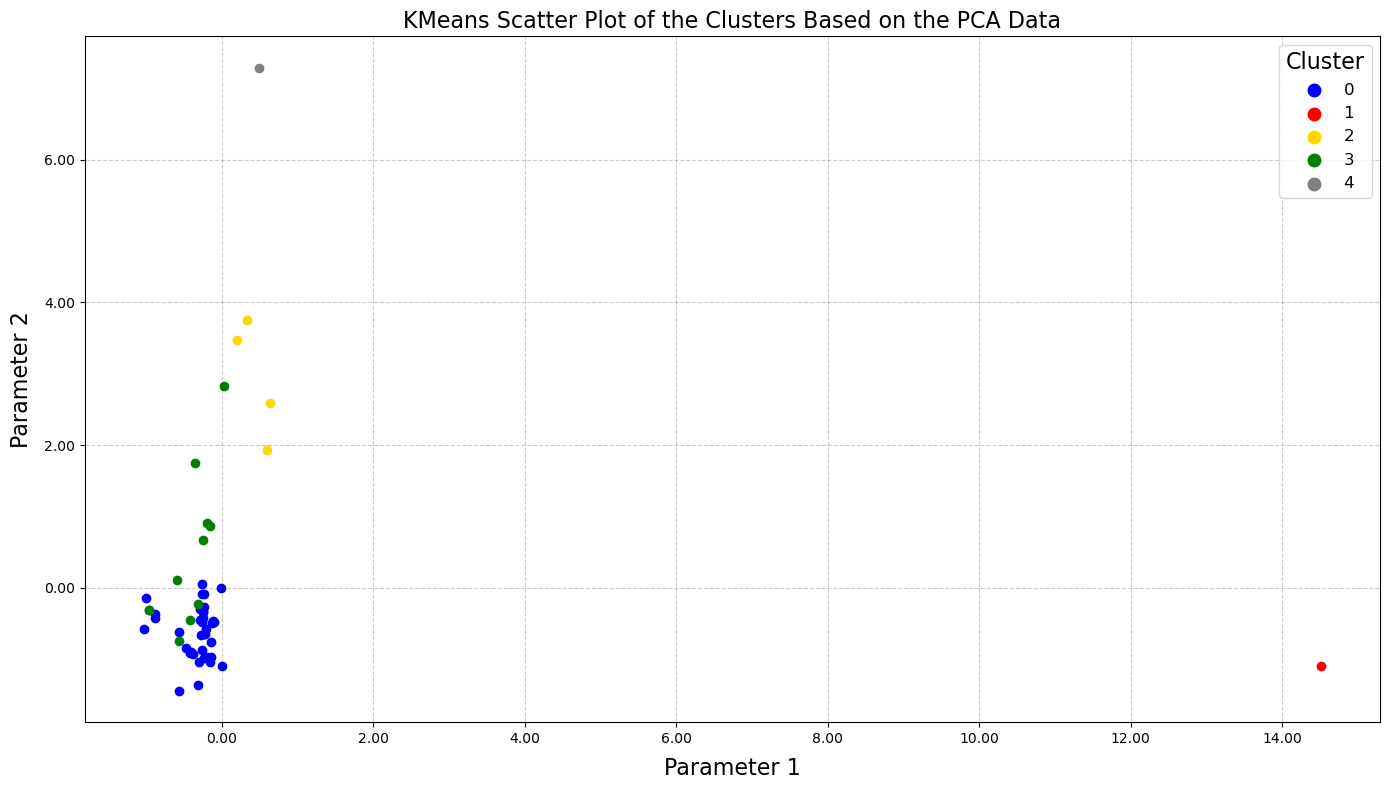

In [57]:
# # Use Matplotlib to make a plot

# Create a list of cluster colors
cluster_colors = ['blue','red','gold','green','gray']

# Create a list of cluster numbers
cluster_numbers = [0,1,2,3,4]

# Initialize the plot in Matplotlib
fig, ax = plt.subplots(figsize=(14,8))

# In order for the legend to work properly, each of the clusters must be plotted in a separate instance
# For each value from 0 to the number of unique clusters:
for i in range(0,len(stock_data_pca_with_predictions_df.kmeans_pca_cluster.unique())):
    # Create a subset of the dataframe containing only the values in that cluster
    dataframe_subset = stock_data_pca_with_predictions_df.loc[stock_data_pca_with_predictions_df['kmeans_pca_cluster'] == i]
    # Plot the subset
    ax.scatter(dataframe_subset['PCA1'],dataframe_subset['PCA2'],color=cluster_colors[i],label=cluster_numbers[i])
    # Annotate the subset if desired
    # if i == i:
    #     for j in range(0,len(dataframe_subset)):
    #         ax.annotate(
    #             dataframe_subset.index[j], # Annotation text
    #             xycoords='data', # How the coordinates are interpreted
    #             xy = (dataframe_subset['avg_revenue_growth_1_yr'][j],dataframe_subset['debt_to_sales'][j]), # Location of the annotation point
    #             xytext=(dataframe_subset['avg_revenue_growth_1_yr'][j]+0.05,dataframe_subset['debt_to_sales'][j]+0.05), # Location of the annotation text
    #             # verticalalignment = 'center',
    #             # bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    #             # arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    #             # size=12
    #         )

# Add a title to the plot
plt.title("KMeans Scatter Plot of the Clusters Based on the PCA Data", fontsize=16)

# Create a variable that refers to the axis
ax = plt.gca()

# Set the x- and y-axis labels
ax.set_xlabel('Parameter 1',fontsize=16,labelpad=8)
ax.set_ylabel('Parameter 2',fontsize=16,labelpad=8)

# Format the y-axis as a percentage
# The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Create a light grid to improve readability
ax.grid(which='major', color='k', linestyle='--', alpha=0.2)

plt.legend(
    title='Cluster'
    # , prop={'size':16}
    , fontsize = 12
    , title_fontsize=16
    , markerscale=1.5
)

# Reduce the whitespace around the plot
plt.tight_layout()

# Save the picture as a PNG
plt.savefig(Path("./Saved_Plots/03_kmeans_scatterplot_pca_data.png"))

plt.show()

## DBSCAN using the PCA Data

Noisy predictions (i.e., outliers) are assigned a cluster value of -1.

In [58]:
# Initialize a DBSCAN model
dbscan_pca_model = DBSCAN(eps=0.40, min_samples=3)

In [59]:
# Fit and predict the model using the scaled data
# Noisy predictions are given a value of -1

# Method 1: using fit_predict
dbscan_pca_predictions = dbscan_pca_model.fit_predict(stock_data_pca_df)

# Method 2: using fit, labels
# dbscan_pca_model.fit(stock_data_pca_df)
# dbscan_pca_predictions = dbscan_pca_model.labels_

In [60]:
# Review the predictions
print(dbscan_pca_predictions)

[ 0  1 -1  0 -1 -1 -1  2  2 -1  2  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0
 -1 -1 -1 -1 -1  1  0  0 -1 -1 -1  0 -1  1 -1 -1  0  0 -1 -1 -1  0  1  1
 -1 -1 -1 -1 -1  0]


In [61]:
# Add a new column with the predicted clusters
stock_data_pca_with_predictions_df['dbscan_pca_cluster'] = dbscan_pca_predictions

# Review the dataframe
stock_data_pca_with_predictions_df.head(54)

,PCA1,PCA2,PCA3,PCA4,kmeans_pca_cluster,dbscan_pca_cluster
ticker,,,,,,
BYDIY,-0.257522,-0.089333,0.735074,-0.424348,0,0
ONTO,-0.138963,-0.967886,-0.386851,-0.858565,0,1
COHR,-0.350224,1.752544,0.459337,2.377113,3,-1
BYDIF,-0.236107,-0.091473,0.736387,-0.421360,0,0
OLED,-0.307450,-1.358739,0.074644,-0.391256,0,-1
MKSI,0.333801,3.757581,-3.211628,2.238031,2,-1
OMRNY,-0.872533,-0.425893,0.602564,-0.367624,0,-1
AMKR,-0.208441,-0.575046,-0.257124,-0.174287,0,2
SOTGY,-0.231358,-0.653468,-0.250104,-0.277401,0,2


In [62]:
# Create a scatter plot using hvPlot
# Color the graph points with the labels found using DBSCAN
# Add the ticker in the `hover_cols` parameter to identify the stock represented by each data point

dbscan_scatter_plot_pca_data = stock_data_pca_with_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="dbscan_pca_cluster",
    hover_cols="ticker"
).opts(
    yformatter="%.0f",
    title='DBSCAN Scatter Plot of the Clusters Based on the PCA Data'
)

dbscan_scatter_plot_pca_data

:NdOverlay   [dbscan_pca_cluster]
   :Scatter   [PCA1]   (PCA2,ticker)

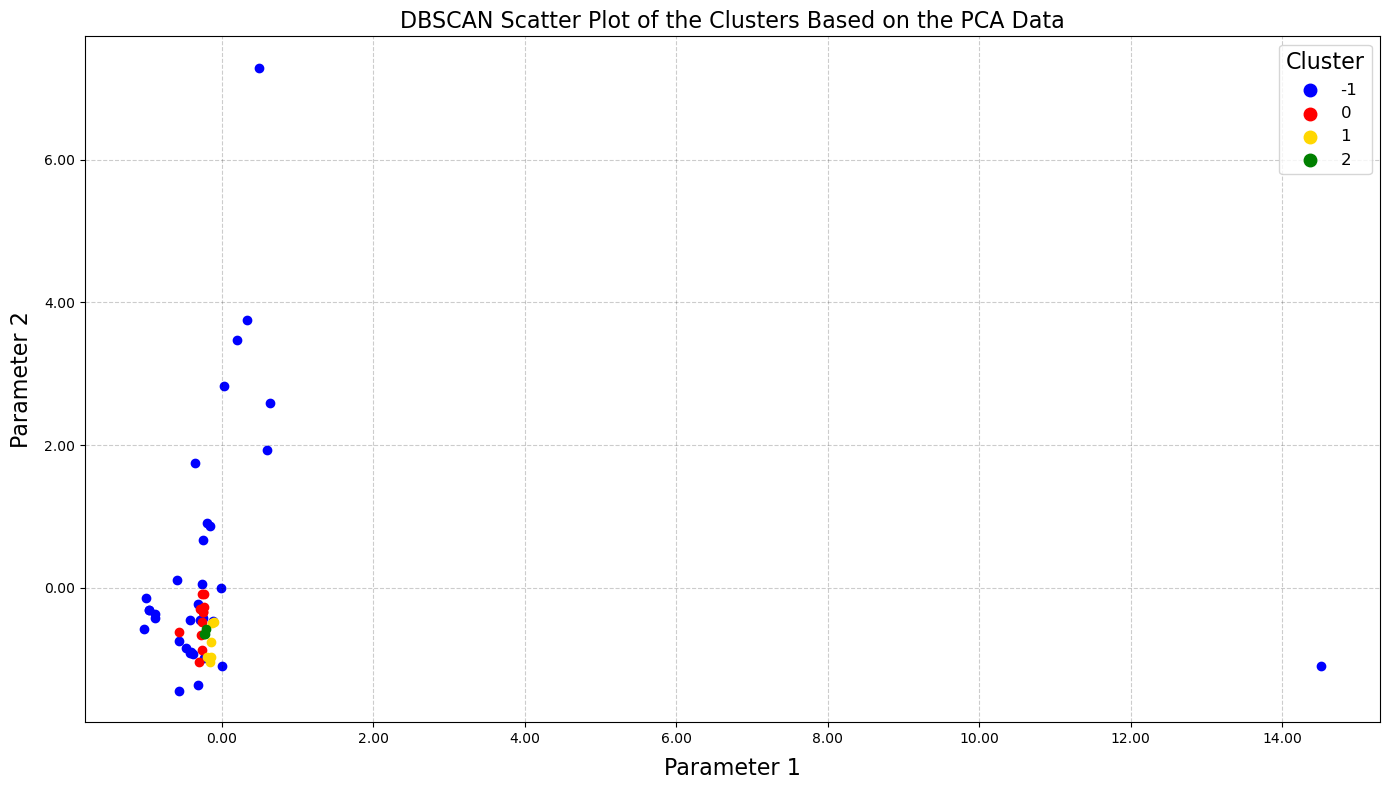

In [63]:
# # Use Matplotlib to make a plot

# Create a list of cluster colors
cluster_colors = ['blue','red','gold','green']

# Create a list of cluster numbers
cluster_numbers = [-1,0,1,2]

# Initialize the plot in Matplotlib
fig, ax = plt.subplots(figsize=(14,8))

# In order for the legend to work properly, each of the clusters must be plotted in a separate instance
# For each value from 0 to the number of unique clusters:
for i in range(0,len(stock_data_pca_with_predictions_df.dbscan_pca_cluster.unique())):
    # Create a subset of the dataframe containing only the values in that cluster
    dataframe_subset = stock_data_pca_with_predictions_df.loc[stock_data_pca_with_predictions_df['dbscan_pca_cluster'] == (i-1)]
    # Plot the subset
    ax.scatter(dataframe_subset['PCA1'],dataframe_subset['PCA2'],color=cluster_colors[i],label=cluster_numbers[i])
    # Annotate the subset if desired
    # if i == i:
    #     for j in range(0,len(dataframe_subset)):
    #         ax.annotate(
    #             dataframe_subset.index[j], # Annotation text
    #             xycoords='data', # How the coordinates are interpreted
    #             xy = (dataframe_subset['avg_revenue_growth_1_yr'][j],dataframe_subset['debt_to_sales'][j]), # Location of the annotation point
    #             xytext=(dataframe_subset['avg_revenue_growth_1_yr'][j]+0.05,dataframe_subset['debt_to_sales'][j]+0.05), # Location of the annotation text
    #             # verticalalignment = 'center',
    #             # bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    #             # arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    #             # size=12
    #         )

# Add a title to the plot
plt.title("DBSCAN Scatter Plot of the Clusters Based on the PCA Data", fontsize=16)

# Create a variable that refers to the axis
ax = plt.gca()

# Set the x- and y-axis labels
ax.set_xlabel('Parameter 1',fontsize=16,labelpad=8)
ax.set_ylabel('Parameter 2',fontsize=16,labelpad=8)

# Format the y-axis as a percentage
# The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Create a light grid to improve readability
ax.grid(which='major', color='k', linestyle='--', alpha=0.2)

plt.legend(
    title='Cluster'
    # , prop={'size':16}
    , fontsize = 12
    , title_fontsize=16
    , markerscale=1.5
)

# Reduce the whitespace around the plot
plt.tight_layout()

# Save the picture as a PNG
plt.savefig(Path("./Saved_Plots/04_dbscan_scatterplot_pca_data.png"))

plt.show()